# 4-3. 스레시홀딩

 - 이미지를 binary(이진화) 이미지로 만드는 이유: 이미지에서 원하는 피사체 모양을 좀 더 정확히 판단하기 위해.
 - thresholding: 여러 점수를 커트라인을 기준으로 합격과 불합격으로 나누는 것처럼 여러 값을 경계점을 기준으로 두 부류로 나누는 것.

#### 4-3-1. 전역 스레시홀딩
 - cv2.threshold(img, threshold, value, type_flag) 함수
  * img: Numpy 배열. 변환할 이미지.
  * threshold: 경계값
  * value: 경계값 기준에 만족하는 픽셀에 적용할 값
  * type_flag: 스레시홀드 적용 방법 지정.
    * cv2.THRESH_BINARY: px > threshold ? value: 0, 픽셀값이 경계값을 넘으면 value를 지정하고, 넘지 못하면 0을 지정
    * cv2.THRESH_BINARY_INV: px > threshold ? 0: value, cv2.THRESH_BINARY의 반대.
    * cv2.THRESH_TRUNC: px > threshold ? value: px, 픽셀값이 경계값을 넘으면 value를 지정하고, 넘지 못하면 원래의 값 유지
    * cv2.THRESH_TOZERO: px > threshold ? px: 0, 픽셀값이 경계값을 넘으면 원래 값을 유지, 넘지 못하면 0을 지정
    * cv2.THRESH_TOZERO_INV: px > threshold ? 0: px, cv2.THRESH_TOZERO의 반대
  * ret: 스레시홀딩에 사용한 경계값
  * out: 결과 바이너리 이미지

127.0


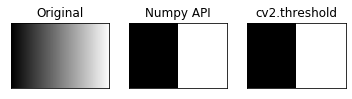

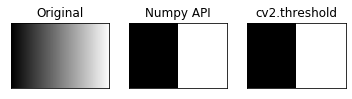

In [3]:
#practice. 바이너리 이미지 만들기
import cv2
import numpy as np
import matplotlib.pylab as plt

#이미지를 그레이스케일로 읽기
img = cv2.imread("../img/gray_gradient.jpg", cv2.IMREAD_GRAYSCALE)

#Numpy 연산으로 바이너리 이미지 만들기 -- ①
thresh_np = np.zeros_like(img)   # 원본과 동일한 크기의 0으로 채워진 이미지
thresh_np[img>127] = 255         # 127보다 큰 값만 255로 변경

#Opencv함수로 바이너리 이미지 만들기 -- ②
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)   #127.0, 바이너리 이미지에 사용된 경계값 반환

#원본과 결과물 출력 -- ③
imgs = {'Original': img, 'Numpy API': thresh_np, 'cv2.threshold': thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap = 'gray')
    plt.xticks([]); plt.yticks([])
    
plt.show(0)

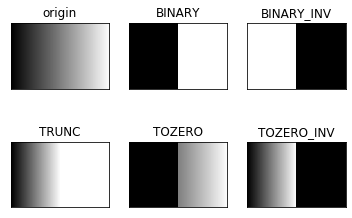

In [5]:
#practice. 스레시홀딩 플래그 실습
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread("../img/gray_gradient.jpg", cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin': img, 'BINARY': t_bin, 'BINARY_INV': t_bininv,
        'TRUNC': t_truc, 'TOZERO': t_2zr, 'TOZERO_INV': t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 3,  i+1)
    plt.title(key)
    plt.imshow(value, cmap = 'gray')
    plt.xticks([]); plt.yticks([])
plt.show()



#### 4-3-2. 오츠의 알고리즘
 - 바이너리 이미지를 만들 때 가장 중요한 작업은 경계값을 얼마로 정할지이다.
 - 현실에는 백색, 흑백으로만 이루어진 이미지보다 다양한 컬러로 이루어진 이미지가 더 많다.
 - 따라서 여러 차레에 걸쳐 경계값을 조금씩 수정하면서 가장 좋은 경계값을 찾아야 한다. 그러나, 경계값을 그렇게 찾기엔 시간도 많이 걸리고 번거롭다.

 - 오츠의 이진화 알고리즘(Otsu's binarization method):
  * 경계값을 임의로 정해서 픽셀들을 두 부류로 나누고 두 부류의 명암 분포를 반복해서 구한 다음 명암 분포를 가장 균일하게 하는 경계값을 선택.
  
               (Vw)^2(t) = w1(t)(V1)^2(t) + w2(t)(V2)^2(t)

     * t: 0~255, 경계값
     * w1, w2: 각 부류의 비율 가중치
     * V1^2, V2^2: 각 부류의 분산

 - ret, t_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
   * 마지막 플래그에 파이프 문자로 연결하여 전달.

otsu threshold:  131.0


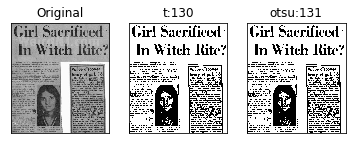

In [10]:
#practice. 오츠의 알고리즘을 적용한 스레시홀드.
import cv2
import numpy as np
import matplotlib.pylab as plt

#이미지를 그레이 스케일로 읽기
img = cv2.imread('../img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)
#경계값을 130으로 지정 -- ①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
#경계값을 지정하지 않고 오츠의 알고리즘 선택 -- ②
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold: ', t)   #오츠의 알고리즘으로 선택된 경계값 출력

imgs = {'Original': img, 't:130': t_130, 'otsu:%d'%t: t_otsu}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()
#t:130,otsu:131
#①에서는 여러 번 시도하여 알아낸 경계값 130을 직접 지정해서 바이너리 이미지를 얻음.
#②에서는 오츠의 알고리즘을 적용, 경계값으로는 의미없는 -1을 전달헀더니 
#경계값 131을 자동적으로 계산하고 적절한 바이너리 이미지를 얻었음.

 - 단, 오츠의 알고리즘은 속도 면에서는 빠르지 못하다는 단점이 있음.
  * 모든 경우의 수에 대해 경계값을 조사하기 때문.
 - 노이즈가 많은 영상에서는 적용해도 좋은 결과를 얻지 못하는 경우가 있다. ==> 블러링 필터를 먼저 적용해야 함.

#### 4-3-3. 적응형 스레시홀드(adaptive threshold)
 - 원본 영상에 조명이 일정하지 않거나, 배경색이 여러 가지인 경우: 하나의 경계값을 이미지 전체에 적용해서는 좋은 결과를 얻지 못함.
 - 이미지를 여러 영역으로 나누고 그 주변 픽셀값만 가지고 계산하여 경계값을 구하는데, 이를 '적응형 스레시홀드'라 함.
 - cv2.adaptiveThreshold(img, value, method, type_flag, block_size, C)
  * img: 입력 영상
  * value: 경계값을 만족하는 픽셀에 적용할 값.
  * method: 경계값 결정방법
    * cv2.ADAPTIVE_THRESH_MEAN_C: 이웃 픽셀의 평균으로 결정
    * cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 가우시안 분포에 따른 가중치의 합으로 결정
  * type_flag: 스레시홀드 적용 방법 지정(cv2.threshold() 함수와 동일)
  * block_size: 영역으로 나눌 이웃의 크기(n * n), 홀수(3, 5, 7, ...)
  * C: 계산된 경계값 결과에서 가감할 상수(음수 가능)

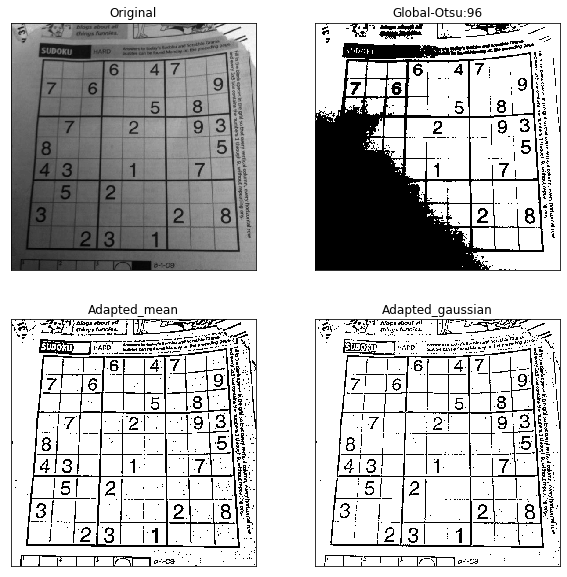

In [18]:
#practice. 적응형 스레시홀드 적용
import cv2
import numpy as np
import matplotlib.pyplot as plt

blk_size = 9  #블럭 사이즈
C = 5         #차감상수
img = cv2.imread('../img/sudoku.png', cv2.IMREAD_GRAYSCALE) #그레이스케일로 읽기

# ①오츠의 알고리즘으로 단일 경계값을 전체 이미지에 적용하는 방식.
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ②adaptive threshold를 평균과 가우시안 분포 method를 각각 적용.
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                           cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                           cv2.THRESH_BINARY, blk_size, C)

# ③결과를 matplot으로 출력
imgs = {'Original': img, 
        'Global_Otsu:%d'%ret:th1,
        'Adapted_mean':th2,
        'Adapted_gaussian': th3}

plt.figure(figsize = (10, 10))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])

plt.show()
#오츠의 알고리즘 적용시 경계값은 96이고, 이를 전체 이미지에 적용하자 좌하단이 검게 타버리고 우상단은 하얗게 날아감.
#적응형 스레시홀드의 mean, gaussian의 경우 오츠의 알고리즘보다 선명하다.
#그 중 gaussian은 선명함은 떨어지나 노이즈(noise, 잡티)가 훨씬 적음이 눈에 띈다.

 - 경계값을 전체 이미지에 적용: 전역적 적용(global)
 - 이미지를 여러 구역으로 나누어 그 구역에 맞는 경계값을 찾음: 지역적 적용(local)
 - ==> 대부분의 이미지는 조명 차이와 그림자 때문에 지역적 적용이 필요함!!